# Análise da Newsletter Alucar
Esse material pertence ao curso **Data Science: Introdução a análise de séries temporais** da Alura.

## Preparando o ambiente

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

sns.set(rc={'figure.figsize':(18, 12)})

## Carregando dados

In [2]:
news = pd.read_csv('dados/newsletter_alucar.csv')
news.sample(10)

,mes,assinantes
5,2017-06-30,66
6,2017-07-31,85
14,2018-03-31,313
7,2017-08-31,107
12,2018-01-31,252
18,2018-07-31,410
4,2017-05-31,49
16,2018-05-31,367
21,2018-10-31,444
15,2018-04-30,341


In [3]:
news.shape

(24, 2)

In [4]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mes         24 non-null     object
 1   assinantes  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [5]:
news.isna().sum()

mes           0
assinantes    0
dtype: int64

## Tratando os dados

In [6]:
news.dtypes

mes           object
assinantes     int64
dtype: object

In [7]:
news.mes = pd.to_datetime(news.mes)

In [10]:
news['aumento'] = news['assinantes'].diff()
news['aceleracao'] = news['aumento'].diff()

crescimento_mensal = np.array([np.NaN])
for index in range(1, len(news.assinantes)):
    mes_anterior = news.assinantes[index - 1]
    crescimento = 0
    if(mes_anterior != 0):
        crescimento = round(((news.assinantes[index] / news.assinantes[index - 1]) - 1), 2)
    else:
        crescimento = np.NaN
    crescimento_mensal = np.append(crescimento_mensal, crescimento)
news['crescimento_mensal'] = crescimento_mensal
news

,mes,assinantes,aumento,aceleracao,crescimento_mensal
0,2017-01-31,0,NaN,NaN,NaN
1,2017-02-28,10,10.0,NaN,NaN
2,2017-03-31,21,11.0,1.0,1.10
3,2017-04-30,34,13.0,2.0,0.62
4,2017-05-31,49,15.0,2.0,0.44
5,2017-06-30,66,17.0,2.0,0.35
6,2017-07-31,85,19.0,2.0,0.29
7,2017-08-31,107,22.0,3.0,0.26
8,2017-09-30,132,25.0,3.0,0.23
9,2017-10-31,160,28.0,3.0,0.21


## Análise gráfica

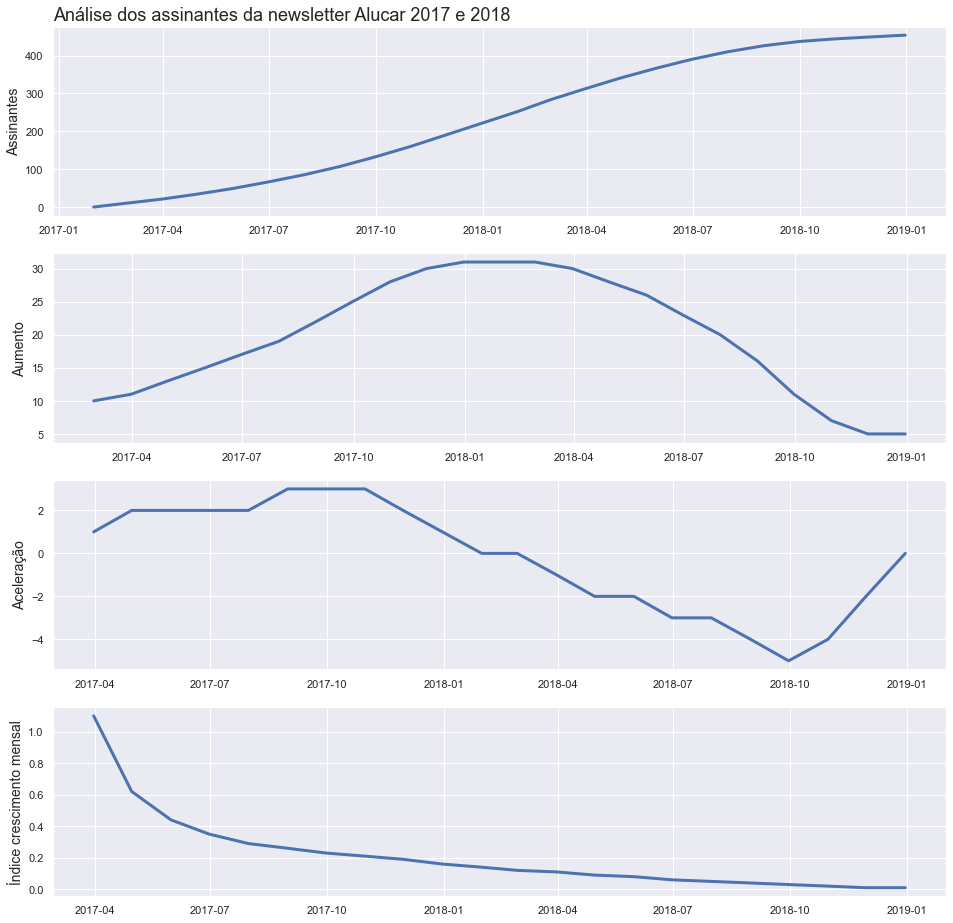

In [11]:
plt.figure(figsize=(16,16))

ax = plt.subplot(4,1,1)
ax.set_title('Análise dos assinantes da newsletter Alucar 2017 e 2018',fontsize=18, loc='left')
lp_vendas = sns.lineplot(x='mes', y='assinantes', data=news, linewidth = 3)
lp_vendas.set_xlabel('')
lp_vendas.set_ylabel('Assinantes', fontsize=14);

plt.subplot(4,1,2)
lp_aumento = sns.lineplot(x='mes', y='aumento', data=news, linewidth = 3)
lp_aumento.set_xlabel('')
lp_aumento.set_ylabel('Aumento', fontsize=14);

plt.subplot(4,1,3)
lp_aceleracao = sns.lineplot(x='mes', y='aceleracao', data=news, linewidth = 3)
lp_aceleracao.set_xlabel('')
lp_aceleracao.set_ylabel('Aceleração', fontsize=14);

plt.subplot(4,1,4)
lp_crescimento_mensal = sns.lineplot(x='mes', y='crescimento_mensal', data=news, linewidth = 3)
lp_crescimento_mensal.set_xlabel('')
lp_crescimento_mensal.set_ylabel('Índice crescimento mensal', fontsize=14);